In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
NDVI = pd.read_excel("NDvI2011-2020.xlsx")
PET = pd.read_excel("pet_2010_2020_Scale0.1.xlsx", infer_datetime_format=True)
SolRad = pd.read_excel("Srad2010-20.xlsx")
AET = pd.read_excel("aet_2010_2020_Scale0.1.xlsx")
Tmin = pd.read_excel("tmin.xlsx")
Tmax = pd.read_excel("tmax.xlsx")

In [13]:
W = 0.5 + (np.array(AET.values[:,1], dtype=int)/np.array(PET.values[:, 1], dtype=int))
W = W.reshape((W.size,1))

In [117]:
PAR = np.array(SolRad.values[:, 1], dtype=int)/20
NdviArray = np.array(NDVI.values[10 :, 1], dtype=float)
Tavg = (np.array(Tmin.values[8 :, 1], dtype=float) + np.array(Tmax.values[8 :, 1], dtype=float))/20

In [118]:
Tavg_new=np.zeros(Tavg.size*2, dtype=float)
for i in range(Tavg.size):
    Tavg_new[2*i] = Tavg[i]
    if 2*(i+1)<Tavg_new.size:
        Tavg_new[2*i+1] = (Tavg[i]+Tavg[i+1])/2
Tavg_new[-1]=(Tavg_new[-24]+Tavg_new[-48])/2


In [119]:
Fr = (NdviArray-np.min(NdviArray))/(np.max(NdviArray)-np.min(NdviArray))
Tstar = (Tavg_new-np.min(Tavg_new))/(np.max(Tavg_new)-np.min(Tavg_new))

In [136]:
Twarmedge = 1-Fr
Mo = Tstar/Twarmedge

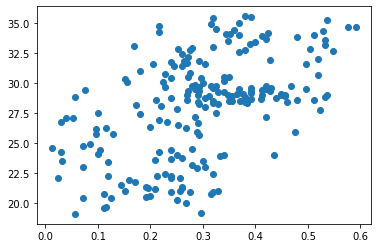

In [135]:
plt.scatter(NdviArray, Tavg_new)